# Topic Modeling (LDA)

The topic modeling algorithm that we have utilized in this approach is one well-known generative probabilistic model that is referred to as **Latent Dirichlet Allocation (LDA)**

LDA receives words as an input vector and generates topics which are probability distribution over words based on a generative process. LDA uses a joint probability distribution over both the observed and hidden random variables and compute the posterior distribution (conditional distribution) of the hidden variables given the observed variables. **The fundamental assumption of LDA is that documents can be assigned to multiple topics**. Another assumption is that topics are hidden variables, and words in documents are visible variables. Thus, LDA performs a generative process by receiving words (*apparent variables*) as an input vector to provide topics (*hidden variables*) which are **probability distribution over words**


## Import Packages
The main package that we have used are *gensim*, *nltk* and *pandas*

In [4]:
import os
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import gensim
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models.phrases import Phrases, Phraser
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import pandas
import re
import pandas
from pprint import pprint

## Read Data and Preprocessing
In this step we read the dataset and select the titles 

In [25]:
colnames = ['sha','source_x','title','doi','pmcid','pubmed_id','license','abstract','publish_time','authors','journal','Microsoft Academic','Paper ID','WHO #Covidence','has_full_text','full_text_file']

df = pandas.read_csv('CORD-19-research-challenge/metadata.csv', dtype=str, names=colnames, low_memory=False)
documents = df.title
df = df.drop(columns=['sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'publish_time', 'journal', 'Microsoft Academic', 'Paper ID', 'WHO #Covidence', 'has_full_text', 'full_text_file'], axis=1)  
df['title'] = df['title'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
df = df.drop(0)
df['title'].head(10) 

1     Intrauterine virus infections and congenital h...
2                     Coronaviruses in Balkan nephritis
3     Cigarette smoking and coronary heart disease: ...
4     Clinical and immunologic studies in identical ...
5     Epidemiology of community-acquired respiratory...
6     Infectious diarrhea: Pathogenesis and risk fac...
7     New perspectives on the pathogenesis of rheuma...
8     Management of acute and chronic respiratory tr...
9     Acute bronchitis: Results of US and European t...
10    Clinical and Immunologic Responses in Patients...
Name: title, dtype: object

In [28]:
         
words=[]
for c in df['title']: 
    words.append(c.split(' '))
print(words[:15])

[['Intrauterine', 'virus', 'infections', 'and', 'congenital', 'heart', 'disease'], ['Coronaviruses', 'in', 'Balkan', 'nephritis'], ['Cigarette', 'smoking', 'and', 'coronary', 'heart', 'disease:', 'new', 'evidence', 'and', 'old', 'reactions'], ['Clinical', 'and', 'immunologic', 'studies', 'in', 'identical', 'twins', 'discordant', 'for', 'systemic', 'lupus', 'erythematosus'], ['Epidemiology', 'of', 'community-acquired', 'respiratory', 'tract', 'infections', 'in', 'adults', 'Incidence', 'etiology', 'and', 'impact'], ['Infectious', 'diarrhea:', 'Pathogenesis', 'and', 'risk', 'factors'], ['New', 'perspectives', 'on', 'the', 'pathogenesis', 'of', 'rheumatoid', 'arthritis'], ['Management', 'of', 'acute', 'and', 'chronic', 'respiratory', 'tract', 'infections'], ['Acute', 'bronchitis:', 'Results', 'of', 'US', 'and', 'European', 'trials', 'of', 'antibiotic', 'therapy'], ['Clinical', 'and', 'Immunologic', 'Responses', 'in', 'Patients', 'with', 'Viral', 'Keratoconjunctivitis'], ['Determination', '

In [30]:
words = [row.split() for row in df['title']]

print(words[:15])



[['Intrauterine', 'virus', 'infections', 'and', 'congenital', 'heart', 'disease'], ['Coronaviruses', 'in', 'Balkan', 'nephritis'], ['Cigarette', 'smoking', 'and', 'coronary', 'heart', 'disease:', 'new', 'evidence', 'and', 'old', 'reactions'], ['Clinical', 'and', 'immunologic', 'studies', 'in', 'identical', 'twins', 'discordant', 'for', 'systemic', 'lupus', 'erythematosus'], ['Epidemiology', 'of', 'community-acquired', 'respiratory', 'tract', 'infections', 'in', 'adults', 'Incidence', 'etiology', 'and', 'impact'], ['Infectious', 'diarrhea:', 'Pathogenesis', 'and', 'risk', 'factors'], ['New', 'perspectives', 'on', 'the', 'pathogenesis', 'of', 'rheumatoid', 'arthritis'], ['Management', 'of', 'acute', 'and', 'chronic', 'respiratory', 'tract', 'infections'], ['Acute', 'bronchitis:', 'Results', 'of', 'US', 'and', 'European', 'trials', 'of', 'antibiotic', 'therapy'], ['Clinical', 'and', 'Immunologic', 'Responses', 'in', 'Patients', 'with', 'Viral', 'Keratoconjunctivitis'], ['Determination', '

 ## Bigram and Trigram 
We need to provide Bigram and Trigram from the orginal texts. 

In [112]:

bigram = Phrases(words, min_count=30, progress_per=10000)
trigram = Phrases(bigram[words], threshold=100)
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

bigrams = [b for l in df['title'] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]


2020-04-16 00:51:53,460 : INFO : collecting all words and their counts
2020-04-16 00:51:53,468 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-04-16 00:51:53,750 : INFO : PROGRESS: at sentence #10000, processed 101705 words and 73486 word types
2020-04-16 00:51:54,017 : INFO : PROGRESS: at sentence #20000, processed 219954 words and 140816 word types
2020-04-16 00:51:54,335 : INFO : PROGRESS: at sentence #30000, processed 356500 words and 209556 word types
2020-04-16 00:51:54,633 : INFO : PROGRESS: at sentence #40000, processed 488720 words and 265091 word types
2020-04-16 00:51:54,759 : INFO : collected 287820 word types from a corpus of 545387 words (unigram + bigrams) and 44220 sentences
2020-04-16 00:51:54,761 : INFO : using 287820 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>



## NLTK Stop words

In [33]:

stop_words = stopwords.words('english')
#stop_words.extend(['school', 'Nonpharmaceutical Interventions', 'education'])


In [35]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

words_nostops = remove_stopwords(words)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
words_bigrams = make_bigrams(words_nostops)

## Create the Dictionary and Corpus needed for Topic Modeling
The LDA function receives *Dictionary* and *Corpus* as inpuut and provides *Topics* as output


We creat dictionary using *corpora.Dictionary*

In [39]:
id2word = corpora.Dictionary(words_bigrams)



2020-04-15 17:32:27,446 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-15 17:32:27,637 : INFO : adding document #10000 to Dictionary(11239 unique tokens: ['congenital', 'disease', 'heart', 'infections', 'intrauterine']...)
2020-04-15 17:32:27,847 : INFO : adding document #20000 to Dictionary(18400 unique tokens: ['congenital', 'disease', 'heart', 'infections', 'intrauterine']...)
2020-04-15 17:32:28,107 : INFO : adding document #30000 to Dictionary(23006 unique tokens: ['congenital', 'disease', 'heart', 'infections', 'intrauterine']...)
2020-04-15 17:32:28,339 : INFO : adding document #40000 to Dictionary(25950 unique tokens: ['congenital', 'disease', 'heart', 'infections', 'intrauterine']...)
2020-04-15 17:32:28,440 : INFO : built Dictionary(27157 unique tokens: ['congenital', 'disease', 'heart', 'infections', 'intrauterine']...) from 44220 documents (total 380630 corpus positions)


## Building the Topic Model
To train the LDA model, we need to define 1) the corpus, 2) dictionary and 3)the number of topics. We also need to determine the values of hyperparameters such as *alpha* and *eta*. The defult values of these parametters are $1/#topic$. Another parameter is *chunksize* that determines the number of documents to be used in each training chunk. Finally *passes* is the total number of training passes. 


In [107]:
texts = words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=30, 
                                       random_state=10,
                                       chunksize=1000,
                                       passes=1,
                                       per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity 
To measure how good provided topics are. The lower value of *Perplexity* shows that the LDA model provides better topics. 


In [97]:
Perplexity = lda_model.log_perplexity(corpus)
print ("Perplexity:", Perplexity)

Perplexity: -9.116137729060073



# Compute Coherence Score
A good LDA model can provide coherent topics. So its topic coherence is high. 

In [111]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3048281689864517


## What is an optimal LDA model ? 
How can we find the best values of Hyperparameters such as number of topics ( Model Hyperparameters) and alpha and beta that are reffered to as Document-Topic Density and and Word-Topic Density, respectivly and known as "Dirichlet hyperparameters". 

### 1. The number of Topics 

In [108]:
start=1
limit=40
step=1
coherence_values = []
model_list = []
for num_topics in range(start, limit, step):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=10,
                                       chunksize=1000,
                                       passes=1,
                                       per_word_topics=True)
    model_list.append(lda_model)
    coherence_model_lda_c_v = CoherenceModel(model=lda_model, texts=words_bigrams, corpus=corpus, dictionary=id2word, coherence="c_v")
    coherence_values.append(coherence_model_lda_c_v.get_coherence())




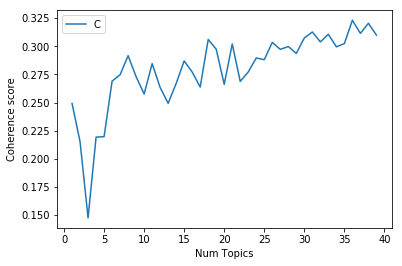

In [100]:
# Show graph
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("CoherenceValues"), loc='best')
plt.show()



In [101]:
PT=coherence_values[10:40]
print(PT)

[0.2845735514136767, 0.26335199284033795, 0.24929370183019137, 0.26693775278423665, 0.28701541088354465, 0.2770875961910526, 0.26373068694320423, 0.3060421943168245, 0.29736256545677875, 0.266154148918622, 0.3020267411384231, 0.26875454570974244, 0.27715015638456536, 0.289628876635092, 0.28805818596396704, 0.30342140705660003, 0.2972242106588175, 0.2997415950021229, 0.2936933064706935, 0.30737090827749447, 0.3126711523062202, 0.3038599263914484, 0.3106844126125418, 0.2994788525297676, 0.30236556612676085, 0.3231306978521659, 0.3114774314925245, 0.3204243350279479, 0.3099404908621244]


In [102]:
Optimal_N_Topic=PT.index(max(PT))+10
print(Optimal_N_Topic)

35


### Run LDA with the optimal number of topics 

In [104]:
texts = words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

Optimal_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=Optimal_N_Topic, 
                                       random_state=10,
                                       chunksize=1000,
                                       passes=1,
                                       per_word_topics=True)

pprint(Optimal_lda_model.print_topics())
doc_lda = lda_model[corpus]

2020-04-15 23:46:04,350 : INFO : topic #13 (0.029): 0.025*"chapter" + 0.015*"viral_infections" + 0.012*"diseases" + 0.011*"index" + 0.010*"surveillance" + 0.009*"virus" + 0.008*"disease" + 0.008*"viral" + 0.008*"infectious_disease" + 0.007*"acute"
2020-04-15 23:46:04,351 : INFO : topic #14 (0.029): 0.018*"pneumonia" + 0.012*"wuhan" + 0.010*"viral" + 0.008*"clinical_characteristics" + 0.008*"patterns" + 0.008*"community" + 0.007*"infection" + 0.007*"coronavirus" + 0.007*"virus" + 0.007*"acquired"
2020-04-15 23:46:04,353 : INFO : topic #4 (0.029): 0.019*"human" + 0.013*"novel" + 0.011*"new" + 0.009*"coronavirus" + 0.007*"spread" + 0.007*"structural" + 0.007*"influenza" + 0.007*"contact" + 0.007*"protein" + 0.006*"viruses"
2020-04-15 23:46:04,356 : INFO : topic #26 (0.029): 0.048*"virus" + 0.010*"vaccine" + 0.010*"cell" + 0.009*"viral" + 0.009*"induced" + 0.008*"expression" + 0.008*"infection" + 0.007*"recombinant" + 0.007*"disease" + 0.007*"vivo"
2020-04-15 23:46:04,358 : INFO : topic #0

[(13,
  '0.025*"chapter" + 0.015*"viral_infections" + 0.012*"diseases" + '
  '0.011*"index" + 0.010*"surveillance" + 0.009*"virus" + 0.008*"disease" + '
  '0.008*"viral" + 0.008*"infectious_disease" + 0.007*"acute"'),
 (14,
  '0.018*"pneumonia" + 0.012*"wuhan" + 0.010*"viral" + '
  '0.008*"clinical_characteristics" + 0.008*"patterns" + 0.008*"community" + '
  '0.007*"infection" + 0.007*"coronavirus" + 0.007*"virus" + 0.007*"acquired"'),
 (4,
  '0.019*"human" + 0.013*"novel" + 0.011*"new" + 0.009*"coronavirus" + '
  '0.007*"spread" + 0.007*"structural" + 0.007*"influenza" + 0.007*"contact" + '
  '0.007*"protein" + 0.006*"viruses"'),
 (26,
  '0.048*"virus" + 0.010*"vaccine" + 0.010*"cell" + 0.009*"viral" + '
  '0.009*"induced" + 0.008*"expression" + 0.008*"infection" + '
  '0.007*"recombinant" + 0.007*"disease" + 0.007*"vivo"'),
 (0,
  '0.015*"virus" + 0.008*"protein" + 0.008*"cells" + 0.007*"interferon" + '
  '0.007*"infection" + 0.006*"highly" + 0.006*"therapeutics" + '
  '0.006*"respi

## visualization
*pyLDAvis* is a python package to provide interactive web-based visualization to describe the topics that have been provided by the LDA model. 

In [105]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt



In [106]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(Optimal_lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
26    -0.094476 -0.068082       1        1  4.704312
23    -0.130639  0.047674       2        1  4.129315
29    -0.129683 -0.007970       3        1  3.991987
34    -0.107127  0.017554       4        1  3.751170
30    -0.037723 -0.060422       5        1  3.714471
16     0.013995 -0.058742       6        1  3.700745
7      0.007820 -0.028551       7        1  3.242103
15     0.083255  0.088930       8        1  3.145035
27    -0.038707 -0.038841       9        1  3.122084
8      0.086927 -0.019682      10        1  2.969208
11    -0.063785 -0.024081      11        1  2.902717
14     0.024942  0.078697      12        1  2.889836
22    -0.003287 -0.026524      13        1  2.860748
20    -0.028248 -0.070625      14        1  2.817872
25     0.039493  0.047679      15        1  2.757709
12    -0.031475 -0.038327      16        1  2.742906
5     -0.007156  0.032718      17        1  2.733443
19     0.007954 -0.006262      18        1  2.713220
0     -0.064760  0.006105      19        1  2.663965
4     -0.014485  0.147152      20        1  2.644223
28    -0.092287  0.012193      21        1  2.614949
33     0.062401 -0.013697      22        1  2.581087
9      0.129100 -0.087169      23        1  2.531981
6      0.042459 -0.005074      24        1  2.518097
31     0.059882  0.100660      25        1  2.508451
10     0.063202 -0.016100      26        1  2.503266
13     0.073040 -0.038636      27        1  2.418238
1     -0.027378 -0.007747      28        1  2.408514
17     0.063766  0.095669      29        1  2.374321
32     0.021721 -0.049209      30        1  2.372204
24     0.029965 -0.015953      31        1  2.309015
3     -0.008806 -0.004192      32        1  2.299957
2      0.023279 -0.030857      33        1  2.265778
21     0.073906 -0.052882      34        1  2.114157
18    -0.027086  0.094595      35        1  1.982915, topic_info=     Category         Freq                  Term        Total  loglift  \
6710  Default   855.000000                 covid   855.000000  30.0000   
7081  Default   633.000000     novel_coronavirus   633.000000  29.0000   
2508  Default  1870.000000  respiratory_syndrome  1870.000000  28.0000   
3612  Default   873.000000                  east   873.000000  27.0000   
4646  Default   862.000000                middle   862.000000  26.0000   
...       ...          ...                   ...          ...      ...   
1348  Topic35    28.958183              receptor   664.326660   0.7877   
93    Topic35    32.114311               protein  1888.123779  -0.1534   
113   Topic35    30.176046                 human  2266.173584  -0.3982   
228   Topic35    27.994055             influenza  1663.293579  -0.1640   
5     Topic35    29.772156                 virus  5221.625488  -1.2464   

      logprob  
6710  30.0000  
7081  29.0000  
2508  28.0000  
3612  27.0000  
4646  26.0000  
...       ...  
1348  -5.5631  
93    -5.4597  
113   -5.5220  
228   -5.5970  
5     -5.5354  

[2804 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
15616     27  0.827350        abl
18902     16  0.858691    aborted
888        4  0.043153  abstracts
888        8  0.014384  abstracts
888        9  0.014384  abstracts
...      ...       ...        ...
5141      35  0.014998   zoonotic
8589      20  0.121861         αβ
8589      28  0.853026         αβ
5036      13  0.917678         γδ
18891     25  0.812384       δerm

[15802 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[27, 24, 30, 35, 31, 17, 8, 16, 28, 9, 12, 15, 23, 21, 26, 13, 6, 20, 1, 5, 29, 34, 10, 7, 32, 11, 14, 2, 18, 33, 25, 4, 3, 22, 19])